# Numerical Simulations

${\bf Author}$:  Sumanth Nethi \\
${\bf Roll \ No}$: AE18B042 \\
${\bf Course}$: AS5545 \\
${\bf Course \ Instructor}$: Dr. Louyi Tao

In [ ]:
# import packages
import numpy as np
from scipy.integrate import odeint           # Python package for integrating non-linear differential equations
import matplotlib.pyplot as plt

## Case - 1

### Data Computation

In [ ]:
# Data Computation

## Given Data
mu = 3.0404*(10**(-6))                       
rho = 0.98872
beta = 0.0101                         #Ligthness Number

## Values for C matrix
mu_bar = ((mu)/(1-rho)**(3)) + ((1-mu)/rho**(3))
c1 = 1 + (2*mu_bar) - (2*beta*(1-mu)/(rho**3))
c2 = 1- mu_bar
c3 = -mu_bar

## Values for B matrix
k = (1-mu)/(rho*rho)
B1 = beta*(0.8099+0.015)/(0.095+0.8099+0.015)
B2 = -beta*(0.8099+0.015)/(0.095+0.8099+0.015)

### Matrices

In [ ]:
A = np.array([
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
    [c1,0,0,0,2,0],
    [0,c2,0,-2,0,0],
    [0,0,c3,0,0,0]
])

B = np.array([
    [0,0,0],
    [0,0,0],
    [0,0,0],
    [k,0,0],
    [0,k*B1,0],
    [0,0,-k*B2]
])

# Given
K = np.array([                                           
    [22.4,0,0,7.01,0,0],
    [0,11800,0,0,3160, 0],
    [0,0,12800,0,0,3100]
])

print('Matrix A:', A )
print('-----------------------------------------------------------------------------------------')
print('Matrix B:', B )
print('-----------------------------------------------------------------------------------------')
print('Matrix K:', K )

Matrix A: [[ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 7.28508623  0.          0.          0.          2.          0.        ]
 [ 0.         -2.15299273  0.         -2.          0.          0.        ]
 [ 0.          0.         -3.15299273  0.          0.          0.        ]]
-----------------------------------------------------------------------------------------
Matrix B: [[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [1.02294443 0.         0.        ]
 [0.         0.00926476 0.        ]
 [0.         0.         0.00926476]]
-----------------------------------------------------------------------------------------
Matrix K: [[2.24e+01 0.00e+00 0.00e+00 7.01e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.18e+04 0.00e+00 0.00e+00 3.16e+03 0.00e+00]
 [0.00e+

### $\widetilde{\text{A}}$

In [ ]:
A_bar = A-np.dot(B,K)
print('A_bar:', A_bar)

A_bar: [[   0.            0.            0.            1.            0.
     0.        ]
 [   0.            0.            0.            0.            1.
     0.        ]
 [   0.            0.            0.            0.            0.
     1.        ]
 [ -15.62886896    0.            0.           -7.17084044    2.
     0.        ]
 [   0.         -111.47714211    0.           -2.          -29.27663662
     0.        ]
 [   0.            0.         -121.74190054    0.            0.
   -28.72075111]]


### Eigenvalues

In [ ]:
e_vals, e_vecs = np.linalg.eig(A_bar)
print("Eigenvalues")
for i in range(6):
  print("Lambda " + str(i+1) + " :", e_vals[i])

Eigenvalues
Lambda 1 : (-24.50488586463771+0j)
Lambda 2 : (-3.2324087904075287+1.5909095076335737j)
Lambda 3 : (-3.2324087904075287-1.5909095076335737j)
Lambda 4 : (-5.4777736115230775+0j)
Lambda 5 : (-5.169157706024329+0j)
Lambda 6 : (-23.551593404704718+0j)


### Numerical Simulations

In [ ]:
# Integration
def model(u, t):
  return [u[3], u[4], u[5], -15.629*u[0]-7.171*u[3]+2*u[4], -111.48*u[1]-2*u[3]-29.28*u[4], -121.742*u[2]-28.72*u[5]]

t = np.linspace(0, (2*np.pi*100)/(365), 1000)
x0 = np.array([3.859*10**(-6), 3.859*10**(-6), 3.859*10**(-6), 1.938*10**(-5), 1.938*10**(-5), 1.938*10**(-5)])   # Given initial state
x = odeint(model, x0, t)
state_x = x[:,0]*1.496*(10**(8))
state_y = x[:,1]*1.496*(10**(8))
state_z = x[:,2]*1.496*(10**(8))
m = 1.496*(10**(11))*2*np.pi/(365*24*60*60)
t_ = 365*t/(2*np.pi)
state_v_x = x[:,3]*m
state_v_y = x[:,4]*m
state_v_z = x[:,5]*m

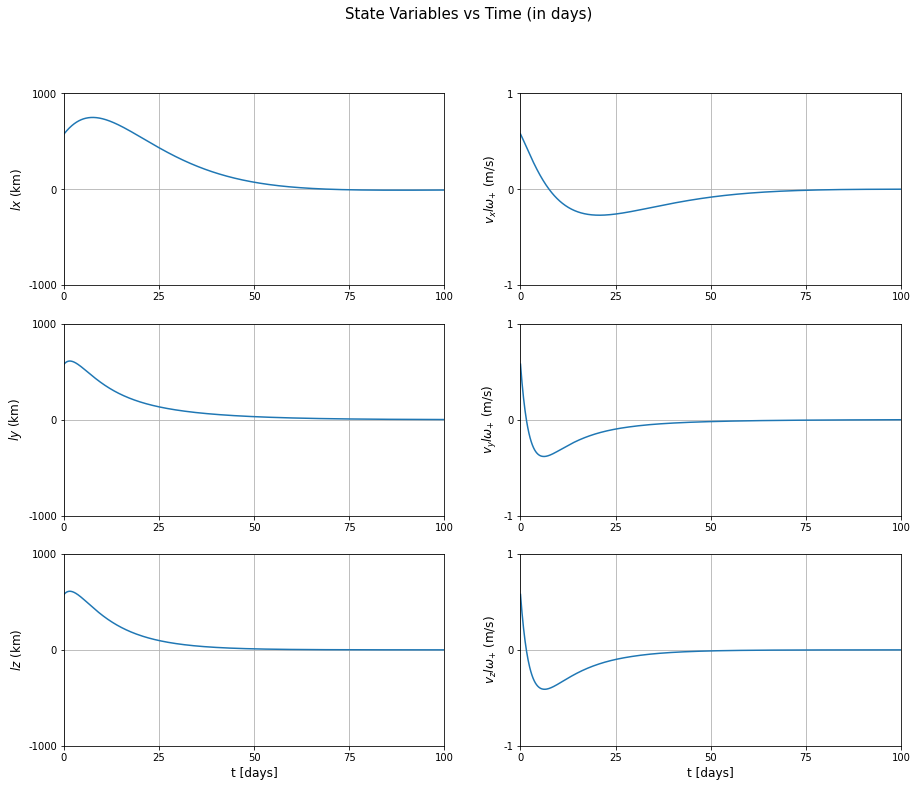

In [ ]:
# Plots
fig = plt.figure(figsize=(15, 12))
plt.suptitle("State Variables vs Time (in days)", fontsize = 15)

plt.subplot(3, 2, 1)
plt.plot(t_, state_x)
plt.ylim([-1000, 1000])
plt.xlim([0, 100])
plt.grid(True)
plt.xticks([0,25,50,75,100],[0,25,50,75,100])
plt.yticks([-1000,0,1000], [-1000,0,1000])
plt.ylabel("$l x$ (km)", fontsize = 12)

plt.subplot(3, 2, 2)
plt.plot(t_, state_v_x)
plt.ylim([-1, 1])
plt.xlim([0, 100])
plt.grid(True)
plt.xticks([0,25,50,75,100],[0,25,50,75,100])
plt.yticks([-1,0,1], [-1,0,1])
plt.ylabel("$v_{x} l \omega_{\plus}$ (m/s)", fontsize = 12)

plt.subplot(3, 2, 3)
plt.plot(t_, state_y)
plt.ylim([-1000, 1000])
plt.xlim([0, 100])
plt.grid(True)
plt.xticks([0,25,50,75,100],[0,25,50,75,100])
plt.yticks([-1000,0,1000], [-1000,0,1000])
plt.ylabel("$l y$ (km)", fontsize = 12)

plt.subplot(3, 2, 4)
plt.plot(t_, state_v_y)
plt.ylim([-1, 1])
plt.xlim([0, 100])
plt.grid(True)
plt.xticks([0,25,50,75,100],[0,25,50,75,100])
plt.yticks([-1,0,1], [-1,0,1])
plt.ylabel("$v_{y} l \omega_{\plus}$ (m/s)", fontsize = 12)

plt.subplot(3, 2, 5)
plt.plot(t_, state_z)
plt.ylim([-1000, 1000])
plt.xlim([0, 100])
plt.grid(True)
plt.xticks([0,25,50,75,100],[0,25,50,75,100])
plt.yticks([-1000,0,1000], [-1000,0,1000])
plt.xlabel("t [days]", fontsize = 12)
plt.ylabel("$l z$ (km)", fontsize = 12)

plt.subplot(3, 2, 6)
plt.plot(t_, state_v_z)
plt.ylim([-1, 1])
plt.xlim([0, 100])
plt.grid(True)
plt.xticks([0,25,50,75,100],[0,25,50,75,100])
plt.yticks([-1,0,1], [-1,0,1])
plt.xlabel("t [days]", fontsize = 12)
plt.ylabel("$v_{z} l \omega_{\plus}$ (m/s)", fontsize = 12)

plt.show()

## Case-2 ($k_{p2} = k_{p3} = k_{d2} = k_{d3} = 0$)

In [ ]:
# New K matrix
K_ = np.array([
    [22.4,0,0,7.01,0,0],
    [0,0,0,0,0, 0],
    [0,0,0,0,0,0]
])

### $\widetilde{\text{A}}$

In [ ]:
A_bar_ = A-np.dot(B,K_)
print('A_bar_:', A_bar_)

A_bar_: [[  0.           0.           0.           1.           0.
    0.        ]
 [  0.           0.           0.           0.           1.
    0.        ]
 [  0.           0.           0.           0.           0.
    1.        ]
 [-15.62886896   0.           0.          -7.17084044   2.
    0.        ]
 [  0.          -2.15299273   0.          -2.           0.
    0.        ]
 [  0.           0.          -3.15299273   0.           0.
    0.        ]]


### Eigenvalues

In [ ]:
e_vals, e_vecs = np.linalg.eig(A_bar_)
print("Eigenvalues")
for i in range(6):
  print("Lambda " + str(i+1) + " :", e_vals[i])

Eigenvalues
Lambda 1 : (-3.5072909807660624+2.5699969630190314j)
Lambda 2 : (-3.5072909807660624-2.5699969630190314j)
Lambda 3 : (-0.0781292396728657+1.331801480097983j)
Lambda 4 : (-0.0781292396728657-1.331801480097983j)
Lambda 5 : 1.7756668395390747j
Lambda 6 : -1.7756668395390747j


### Numerical Simulations

In [ ]:
# Integration
def model2(u, t):
  return [u[3], u[4], u[5], -15.629*u[0]-7.171*u[3]+2*u[4], -2.153*u[1]-2*u[3], -3.153*u[2]]

t2 = np.linspace(0, 10*np.pi, 10000)
x2_0 = np.array([3.859*10**(-6), 3.859*10**(-6), 3.859*10**(-6), 1.938*10**(-5), 1.938*10**(-5), 1.938*10**(-5)])   # Given initial state
x2 = odeint(model2, x2_0, t2)
state2_x = x2[:,0]*1.496*(10**(8))
state2_y = x2[:,1]*1.496*(10**(8))
state2_z = x2[:,2]*1.496*(10**(8))
m = 1.496*(10**(11))*2*np.pi/(365*24*60*60)
t2_ = t2/(2*np.pi)
state2_v_x = x2[:,3]*m
state2_v_y = x2[:,4]*m
state2_v_z = x2[:,5]*m

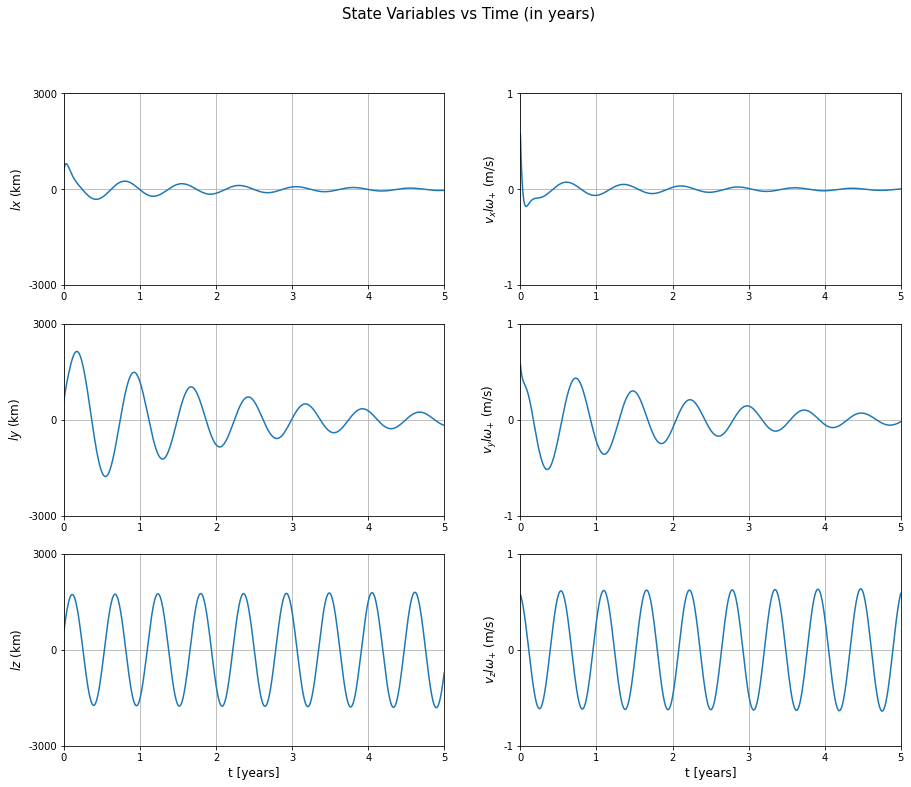

In [ ]:
# Plots
fig = plt.figure(figsize=(15, 12))
plt.suptitle("State Variables vs Time (in years)", fontsize = 15)

plt.subplot(3, 2, 1)
plt.plot(t2_, state2_x)
plt.ylim([-3000, 3000])
plt.xlim([0, 5])
plt.grid(True)
plt.yticks([-3000,0,3000], [-3000,0,3000])
plt.xticks([0,1,2,3,4,5], [0,1,2,3,4,5])
plt.ylabel("$l x$ (km)", fontsize = 12)

plt.subplot(3, 2, 2)
plt.plot(t2_, state2_v_x)
plt.ylim([-1, 1])
plt.xlim([0, 5])
plt.grid(True)
plt.yticks([-1,0,1],[-1,0,1])
plt.xticks([0,1,2,3,4,5], [0,1,2,3,4,5])
plt.ylabel("$v_{x} l \omega_{\plus}$ (m/s)", fontsize = 12)

plt.subplot(3, 2, 3)
plt.plot(t2_, state2_y)
plt.ylim([-3000, 3000])
plt.xlim([0, 5])
plt.grid(True)
plt.yticks([-3000,0,3000], [-3000,0,3000])
plt.xticks([0,1,2,3,4,5], [0,1,2,3,4,5])
plt.ylabel("$l y$ (km)", fontsize = 12)

plt.subplot(3, 2, 4)
plt.plot(t2_, state2_v_y)
plt.ylim([-1, 1])
plt.xlim([0, 5])
plt.grid(True)
plt.yticks([-1,0,1],[-1,0,1])
plt.xticks([0,1,2,3,4,5], [0,1,2,3,4,5])
plt.ylabel("$v_{y} l \omega_{\plus}$ (m/s)", fontsize = 12)

plt.subplot(3, 2, 5)
plt.plot(t2_, state2_z)
plt.ylim([-3000, 3000])
plt.xlim([0, 5])
plt.grid(True)
plt.yticks([-3000,0,3000], [-3000,0,3000])
plt.xticks([0,1,2,3,4,5], [0,1,2,3,4,5])
plt.xlabel("t [years]", fontsize = 12)
plt.ylabel("$l z$ (km)", fontsize = 12)

plt.subplot(3, 2, 6)
plt.plot(t2_, state2_v_z)
plt.ylim([-1, 1])
plt.xlim([0, 5])
plt.grid(True)
plt.yticks([-1,0,1],[-1,0,1])
plt.xticks([0,1,2,3,4,5], [0,1,2,3,4,5])
plt.xlabel("t [years]", fontsize = 12)
plt.ylabel("$v_{z} l \omega_{\plus}$ (m/s)", fontsize = 12)

plt.show()

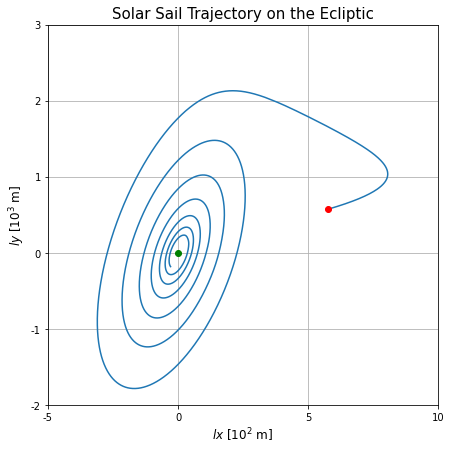

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(state2_x/100 , state2_y/1000)
plt.plot([0], [0], 'go')
plt.plot([state2_x[0]/100], [state2_y[0]/1000], 'ro')
plt.grid(True)
plt.xticks([-5,0,5,10], [-5,0,5,10])
plt.yticks([-2,-1,0,1,2,3], [-2,-1,0,1,2,3])
plt.xlim([-5,10])
plt.ylim([-2,3])
plt.xlabel("$l x$ [$10^2$ m]", fontsize = 12)
plt.ylabel("$l y$ [$10^3$ m]", fontsize = 12)
plt.title("Solar Sail Trajectory on the Ecliptic", fontsize = 15)
plt.show()